In [ ]:
## Unnesting the Values.

In [2]:
import pandas as pd
df = pd.read_csv('netflix.csv')
df['cast'] = df['cast'].str.split(',')

In [3]:
df1 = df[['title', 'cast']]

In [4]:
df1.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."


In [5]:
df1 = df1.explode('cast')
df1.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [6]:
df2 = df[['title','listed_in']].copy()
df2['listed_in'] = df['listed_in'].str.split(',')
df2 = df2.explode('listed_in')

In [7]:
df2.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [8]:
df3 = df[['title','director']].copy()
df3['director'] = df3['director'].str.split(',')
df3 = df3.explode('director')

In [9]:
df3.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN


In [10]:
df4 = df[['title', 'country']].copy()
df4['country'] = df4['country'].str.split(',')
df4 = df4.explode('country')
df4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India


In [ ]:
## Merging all the columns together after unnesting the values.

In [11]:
df5 = pd.merge(df1,df2, how = 'inner', on = 'title')
df5.head()

,title,cast,listed_in
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows


In [12]:
df6 = pd.merge(df5,df3, how = 'inner', on = 'title')
df6.head()

,title,cast,listed_in,director
0,Dick Johnson Is Dead,NaN,Documentaries,Kirsten Johnson
1,Blood & Water,Ama Qamata,International TV Shows,NaN
2,Blood & Water,Ama Qamata,TV Dramas,NaN
3,Blood & Water,Ama Qamata,TV Mysteries,NaN
4,Blood & Water,Khosi Ngema,International TV Shows,NaN


In [13]:
df_f = pd.merge(df6,df4, how = 'inner', on = 'title')
df_f.head()

,title,cast,listed_in,director,country
0,Dick Johnson Is Dead,NaN,Documentaries,Kirsten Johnson,United States
1,Blood & Water,Ama Qamata,International TV Shows,NaN,South Africa
2,Blood & Water,Ama Qamata,TV Dramas,NaN,South Africa
3,Blood & Water,Ama Qamata,TV Mysteries,NaN,South Africa
4,Blood & Water,Khosi Ngema,International TV Shows,NaN,South Africa


In [14]:
df.drop(['director','cast','listed_in','country'], axis = 1, inplace = True)

In [15]:
df.drop('description', axis = 1, inplace = True)

In [16]:
df_final = pd.merge(df,df_f, how = 'inner', on = 'title')
df_final.head()


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,NaN,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,NaN,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,NaN,South Africa


In [ ]:
## Replacing Nan date column with an random date and changing its data type to datetime

In [17]:
df_final['date_added'].fillna('January 1, 1900', inplace = True)

In [18]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'])

In [19]:
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,NaN,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,NaN,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,NaN,South Africa


In [20]:
df_final['duration'] = df_final['duration'].str.split(' ').str[0]

In [21]:
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,TV Dramas,NaN,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,TV Mysteries,NaN,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,International TV Shows,NaN,South Africa


In [ ]:
## Droppint the row which has all null values and replacing empty columns with their respective name.

In [22]:
df_final.dropna(how = 'all', inplace = True)

In [23]:
df_final['cast'].fillna(value = 'Unknown Cast', inplace = True)

In [24]:
df_final['director'].fillna(value = 'Unknown Director', inplace = True)

In [25]:
df_final['rating'].fillna(value = 'Unknown Rating', inplace = True)

In [26]:
df_final['duration'].fillna(value = 'Unknown duration', inplace = True)

In [27]:
df_final['country'].fillna(value = 'Unknown Country', inplace = True)

In [28]:
df_final.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast            0
listed_in       0
director        0
country         0
dtype: int64

In [29]:
df_final.head(2)

,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Unknown Cast,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,International TV Shows,Unknown Director,South Africa


In [ ]:
### Basic EDA

In [ ]:
# Top 10 Number of releases Category Wise using Non Grpahical Analysis

In [30]:
df_top10_cat = df_final.groupby('listed_in')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
df_top10_cat.rename(columns = {'listed_in':'Category', 'title':'counts'}, inplace = True)
df_top10_cat

,Category,counts
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
5,Dramas,827
6,International TV Shows,774
7,Independent Movies,736
8,TV Dramas,696
9,Romantic Movies,613


In [57]:
# Top 10 Number of releases Category Wise using Graphical Analysis

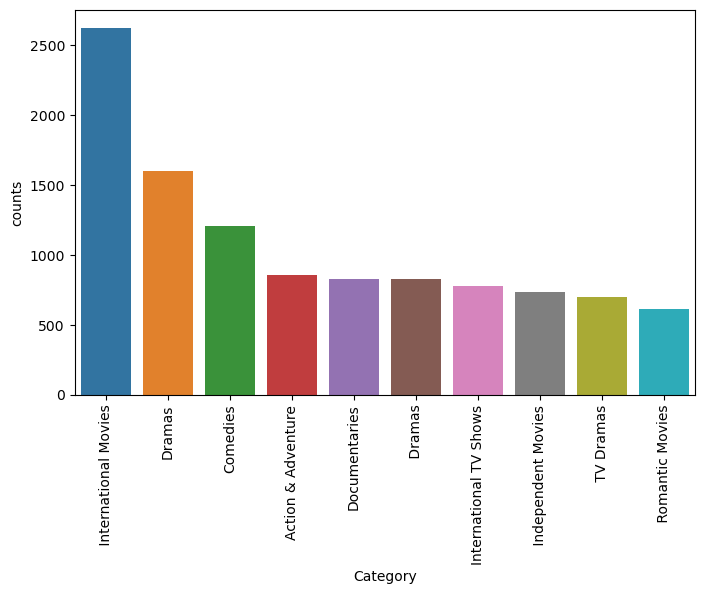

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.barplot(data = df_top10_cat, x = 'Category', y = 'counts')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
### Country Wise Movies & TV Show Released

In [32]:
df_top10_movies = df_final[df_final['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().head(11)
df_top10_movies.rename(columns = {'country':'Country', 'title':'Movies released'},inplace = True)
df_top10_movies = df_top10_movies[df_top10_movies['Country'] != 'Unknown Country']
df_top10_movies

,Country,Movies released
0,United States,2364
1,India,927
3,United States,388
4,United Kingdom,382
5,Canada,187
6,France,155
7,United Kingdom,152
8,France,148
9,Canada,132
10,Spain,129


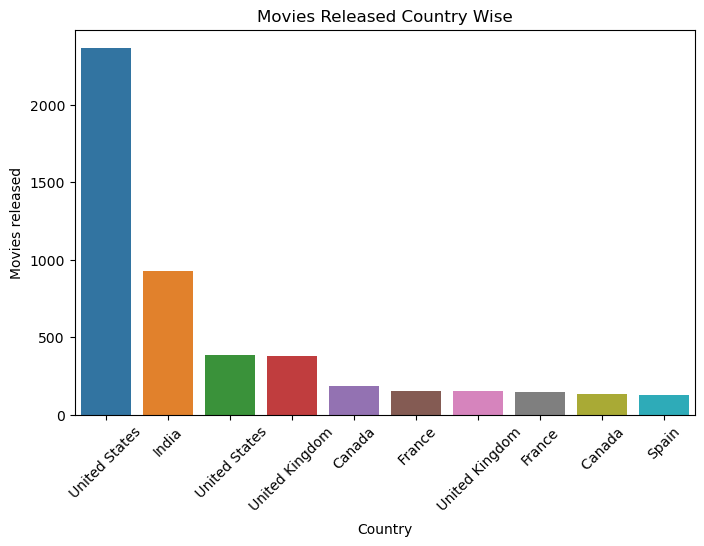

In [49]:
plt.figure(figsize = (8,5))
plt.title('Movies Released Country Wise')
sns.barplot(data = df_top10_movies, x = 'Country', y = 'Movies released')
plt.xticks(rotation = 45)
plt.show()

In [34]:
df_top10_tv = df_final[df_final['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending = False).head(11).reset_index()
df_top10_tv.rename(columns = {'country': 'Country', 'title':'TV Show Released'}, inplace = True)
df_top10_tv = df_top10_tv[df_top10_tv['Country'] != 'Unknown Country']
df_top10_tv

,Country,TV Show Released
0,United States,847
2,United Kingdom,246
3,Japan,174
4,South Korea,164
5,United States,91
6,Canada,84
7,India,81
8,Taiwan,70
9,France,64
10,Australia,56


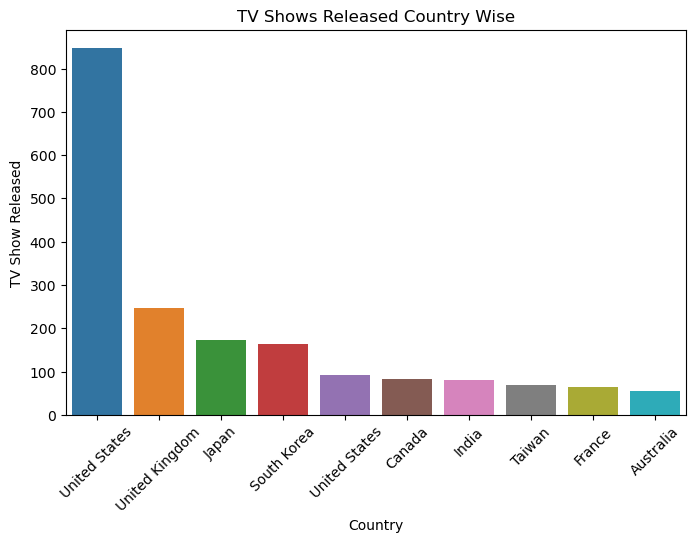

In [48]:
plt.figure(figsize = (8,5))
plt.title('TV Shows Released Country Wise')
sns.barplot(data = df_top10_tv, x = 'Country', y = 'TV Show Released')
plt.xticks(rotation = 45)
plt.show()

In [162]:
## Best Month to release the Movie

In [36]:
df_best_month = df_final[['date_added','type','title']]
df_best_month = df_best_month[df_best_month['type'] == 'Movie'].groupby(df_best_month['date_added'].dt.month_name())['title'].nunique().reset_index()
df_best_month.rename(columns = {'date_added' : 'Mon', 'title': 'Number of movie released' }).sort_values(by = 'Number of movie released', ascending = False)

,Mon,Number of movie released
5,July,565
0,April,550
2,December,547
4,January,546
10,October,545
7,March,529
1,August,519
11,September,519
9,November,498
6,June,492


In [102]:
## Best Month to release the TV Show

In [37]:
df_best_TVshow = df_final[['date_added','type','title']]
df_best_TVshow = df_best_TVshow[df_best_TVshow['type'] == 'TV Show'].groupby(df_best_TVshow['date_added'].dt.month_name())['title'].nunique().reset_index()
df_best_TVshow.rename(columns = {'date_added' : 'Month', 'title': 'Number of TV Show released' }).sort_values(by = 'Number of TV Show released', ascending = False)

,Month,Number of TV Show released
2,December,266
5,July,262
11,September,251
1,August,236
6,June,236
10,October,215
0,April,214
7,March,213
9,November,207
4,January,202


In [ ]:
## Best week to release the Movie

In [38]:
df_best_month1 = df_final[['date_added','type','title']]
df_best_month1 = df_best_month1[df_best_month1['type'] == 'Movie'].groupby(df_best_month1['date_added'].dt.isocalendar().week)['title'].nunique().reset_index()
df_best_month1.rename(columns = {'date_added' : 'Week', 'title': 'Number of movie released' }).sort_values(by = 'Number of movie released', ascending = False).head()

,week,Number of movie released
0,1,316
43,44,243
39,40,215
8,9,207
25,26,195


In [106]:
## Best week to release TV Show

In [39]:
df_best_TVshow1 = df_final[['date_added','type','title']]
df_best_TVshow1 = df_best_TVshow1[df_best_TVshow1['type'] == 'TV Show'].groupby(df_best_TVshow1['date_added'].dt.isocalendar().week)['title'].nunique().reset_index()
df_best_TVshow1.rename(columns = {'date_added' : 'Month', 'title': 'Number of TV Show released' }).sort_values(by = 'Number of TV Show released', ascending = False).head()

,week,Number of TV Show released
26,27,86
30,31,83
12,13,76
43,44,75
23,24,75


In [109]:
# Top 10 director who have done most movies or TV Shows

In [47]:
df_top10_dir = df_final.groupby('director')['title'].nunique().sort_values(ascending = False).head(11).reset_index()
df_top10_dir.rename(columns = {'director' : 'Director', 'title' : 'count'},inplace = True)
df_top10_dir = df_top10_dir[df_top10_dir['Director'] != 'Unknown Director']
df_top10_dir

,Director,count
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


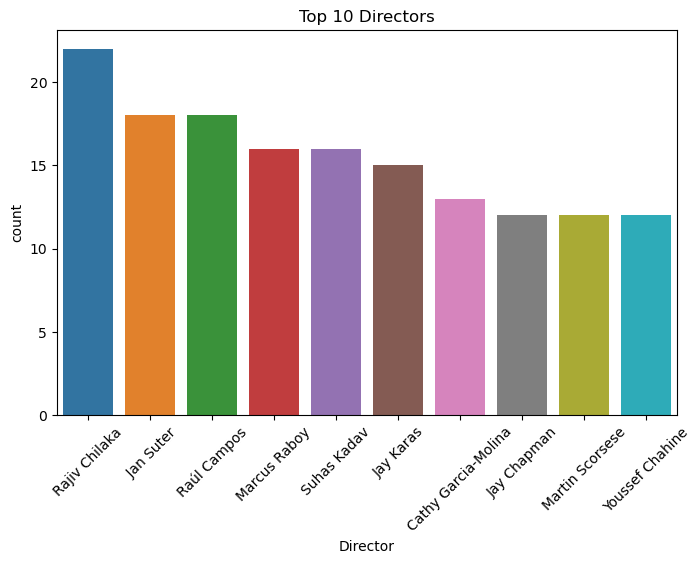

In [51]:
plt.figure(figsize = (8,5))
plt.title('Top 10 Directors')
sns.barplot(data = df_top10_dir, x = 'Director', y = 'count')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Top 10 Actor who had done most of the movies.

In [54]:
df_top10_act = df_final.groupby('cast')['title'].nunique().sort_values(ascending = False).head(11).reset_index()
df_top10_act.rename(columns = {'cast' : 'Cast', 'title' : 'count'},inplace = True)
df_top10_act = df_top10_act[df_top10_act['Cast'] != 'Unknown Cast']
df_top10_act

,Cast,count
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Rajesh Kava,26
7,Shah Rukh Khan,26
8,Boman Irani,25
9,Paresh Rawal,25
10,Yuki Kaji,25


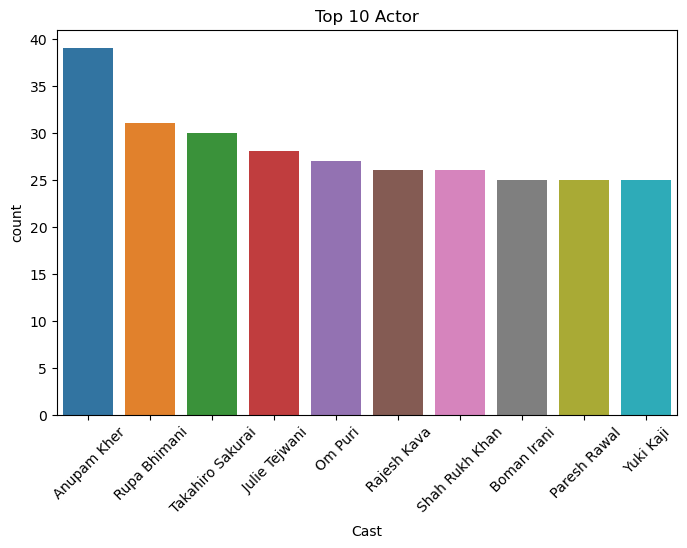

In [56]:
plt.figure(figsize = (8,5))
plt.title('Top 10 Actor')
sns.barplot(data = df_top10_act, x = 'Cast', y = 'count')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Most type of genre produced on Netflix

In [62]:
df_genre = df_final.groupby('listed_in')['title'].nunique().sort_values(ascending = False).head(5).reset_index()
df_genre.rename(columns = {'listed_in' : 'Genre', 'title' : 'count'},inplace = True)
df_genre

,Genre,count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


In [ ]:
## Movie and TV Show release trend over a past 10 years

In [70]:
df_trend = df_final.groupby('release_year')['title'].nunique().tail(10).reset_index()
df_trend.rename(columns = {'release_year' : 'Year', 'title' : 'count'},inplace = True)
df_trend

,Year,count
0,2012,237
1,2013,288
2,2014,352
3,2015,560
4,2016,902
5,2017,1032
6,2018,1147
7,2019,1030
8,2020,953
9,2021,592


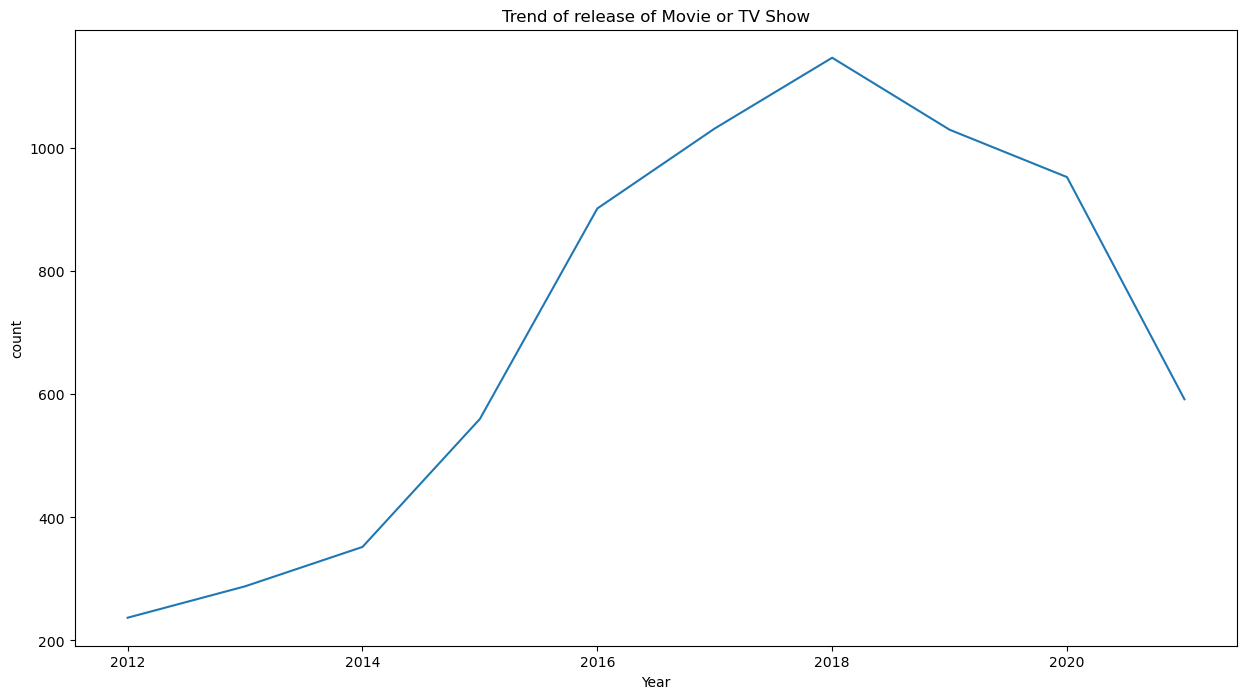

In [77]:
plt.figure(figsize = (15,8))
plt.title('Trend of release of Movie or TV Show')
sns.lineplot(data = df_trend, x = 'Year', y = 'count')
plt.show()

In [ ]:
## Best time to add movie on netflix after the release

In [83]:
df_diff = df_final['date_added'].dt.year - df_final['release_year']
df_diff.mode()[0]

0

Analysis
--
- Most of the Movies or TV Shows released on netflix are from International Movies Category
- Most of Movies are released in United States & India
- Most of TV Shows are released in United States & United Kingdom
- July is the best month to release a Movie & December is the best month to release the TV Shows on Netflix
- Most of Movies are released in 1st week and TV Shows are released on 27th week
- Rajiv Chilak is the Director who had done most of the movies
- Anupam Kher is the Actor who had done most of the movies
- From 2012 to 2018 the release of Movies and TV Shows had increase gradually and after 2019 the number of release have been decreased gradually
- Movies or TV Show should be released within 1 year after the released year

Recommedations
--
- Netflix should also focus on countries where ther is less release of Movie & TV Show
- Korean Drama and TV Show releated to them should be more release in India as most of the Indian crowd had started watching that
- Hit Movies & TV Show should be released during thr vacation time or when there is not more new release on netflix
- Netlix should also look upon increasing the content Sci-Fi and Sport Movies